In [21]:
import numpy as np

In [22]:
m = np.ones((3,3))/9
x = np.ndenumerate(m)

for i in x:
    print(i)

((0, 0), 0.1111111111111111)
((0, 1), 0.1111111111111111)
((0, 2), 0.1111111111111111)
((1, 0), 0.1111111111111111)
((1, 1), 0.1111111111111111)
((1, 2), 0.1111111111111111)
((2, 0), 0.1111111111111111)
((2, 1), 0.1111111111111111)
((2, 2), 0.1111111111111111)


In [23]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
a = np.round(np.random.randn(3,3)*20)
a

array([[ 9., 19.,  3.],
       [ 7., -0., 21.],
       [ 3., -4., 26.]])

In [25]:
np.min(a)


-4.0

In [26]:
'''
___OVERVIEW___
CODE FOR QUESTION 2 - HW 3

___SUMMARY___
Filterning (linear and non-linear)

___AUTHOR___
Amirhossein Daraie — 9733023

___DATE___
18/April/2021
29/01/1400

'''

import numpy as np
import matplotlib.pyplot as plt
import cv2

def filter(image ,mode="averaging", size=3, padding=1, stride=1):   
    
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='symmetric')

    kernel_height, kernel_width = (size,size)
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)       
        
    if mode == "averaging" :
        kernel = np.ones((size,size))/size**2
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
                
    elif mode == "median":
        kernel = np.ones((size,size))
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.median(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width]).astype(np.float32)

    return new_image


# load image
image = cv2.imread("retina.jpg", flags=cv2.IMREAD_GRAYSCALE)
# apply filters
avg3x3 = filter(image, mode='averaging')
med3x3 = filter(image, mode='median')

fig, ax = plt.subplots(1,3,figsize=(6,3))
st = fig.suptitle("Average and Median", fontsize="x-large")

ax[0].title.set_text('original')
ax[0].imshow(image,vmin=avg3x3.min(),vmax=avg3x3.max(), cmap='gray', interpolation='nearest')

ax[1].title.set_text('averaging (3x3)')
ax[1].imshow(avg3x3,vmin=avg3x3.min(),vmax=avg3x3.max(), cmap='gray', interpolation='nearest')

ax[2].title.set_text('median (3x3)')
ax[2].imshow(med3x3,vmin=med3x3.min(),vmax=med3x3.max(), cmap='gray', interpolation='nearest')

for axi in ax.ravel():
    axi.axis('off')
plt.tight_layout()
# plt.savefig('9733023-2_image1.png', bbox_inches='tight')
plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (0,2)

In [ ]:
image = cv2.imread("retina.jpg", flags=cv2.IMREAD_GRAYSCALE)

In [ ]:
image

In [ ]:
def frange(start=0, stop=1, jump=0.1):
    nsteps = int((stop-start)/jump)
    dy = stop-start
    # f(i) goes from start to stop as i goes from 0 to nsteps
    return [start + float(i)*dy/nsteps for i in range(nsteps)]

tsteps = frange(-2,2,0.01)

In [ ]:
a = np.array([1, 2], dtype=np.float32)

In [27]:
a = np.asarray(a, dtype="uint8" )

In [28]:
type(a[0])

numpy.ndarray

In [29]:
'''
___OVERVIEW___
CODE FOR QUESTION 2 - HW 3

___SUMMARY___
Noise reduction with avg and median filters
Intensity transformations: for contrast manipulation or image thresholding
Power-Law (Gamma) Transformation


___AUTHOR___
Amirhossein Daraie — 9733023

___DATE___
18/April/2021
29/01/1400

'''

'''
Intensity transformations:
1. Image Negatives (Linear)
    s = L-1-r 
    r: initial intensity level
    s: final intensity level
2. Log Transformations
    s = clog(1+r)
    c: scaling constant given by 255/(log (1 + m))
    m: maximum pixel value in image
    * maps a narrow range of low-intensity input values to a wide range of output values
3. Power-Law (Gamma) Transformations
    s = cr^(gamma)
    our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion.
    it prevents bleaching or darkening of images when viewed from different types of monitors 
4. Piecewise-Linear Transformation Functions
'''

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


def filter(image ,mode="averaging", size=3, padding=1, stride=1):   
    
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='symmetric')

    kernel_height, kernel_width = (size,size)
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)       
        
    if mode == "averaging" :
        kernel = np.ones((size,size))/size**2
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
                
    elif mode == "median":
        kernel = np.ones((size,size))
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.median(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width]).astype(np.float32)
                
    elif mode == "laplacian":
        kernel = np.array([[-1,-1,-1 ],
                           [-1,8,-1],
                           [-1,-1,-1]]) 
        for y in range(0, output_height):
            for x in range(0, output_width):
                new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, 
                                                x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

    return new_image


################################################################
##### Part 1
################################################################

# load image
image = cv2.imread("retina_image.jpg", flags=cv2.IMREAD_GRAYSCALE)
# apply filters
avg3x3 = filter(image, mode='averaging')
med3x3 = filter(image, mode='median')

# fig, ax = plt.subplots(1,3,figsize=(6,3))
# st = fig.suptitle("Average and Median", fontsize="x-large")

# ax[0].title.set_text('original')
# ax[0].imshow(image,vmin=image.min(),vmax=image.max(), cmap='gray', interpolation='nearest')

# ax[1].title.set_text('averaging (3x3)')
# ax[1].imshow(avg3x3,vmin=avg3x3.min(),vmax=avg3x3.max(), cmap='gray', interpolation='nearest')

# ax[2].title.set_text('median (3x3)')
# ax[2].imshow(med3x3,vmin=med3x3.min(),vmax=med3x3.max(), cmap='gray', interpolation='nearest')

# for axi in ax.ravel():
#     axi.axis('off')
# plt.tight_layout()
# # plt.savefig('9733023-3_image1.png', bbox_inches='tight')
# plt.show()


################################################################
##### Part 2
################################################################

def gamma_transformation(image, gamma=1.2):
    """Power-Law (Gamma) Transformations
    s = cr^(gamma)
    our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion.
    it prevents bleaching or darkening of images when viewed from different types of monitors 

    Args:
        image (numpy 8bit image): Input image
        gamma (float, optional): gamma value can be 0.1, 0.5, 1.2, 2.2, etc. Defaults to 1.2.

    Returns:
        numpy 8bit image: Gamma corrected output
    """
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
    return gamma_corrected

gamma_corr = gamma_transformation(med3x3,gamma=2/3)

# fig, ax = plt.subplots(1,2,figsize=(6,4))
# st = fig.suptitle("Gamma corrected image", fontsize="x-large")

# ax[0].title.set_text('original')
# ax[0].imshow(med3x3,vmin=med3x3.min(),vmax=med3x3.max(), cmap='gray', interpolation='nearest')

# ax[1].title.set_text('output $γ=2/3$')
# ax[1].imshow(gamma_corr,vmin=gamma_corr.min(),vmax=gamma_corr.max(), cmap='gray', interpolation='nearest')

# for axi in ax.ravel():
#     axi.axis('off')
# plt.tight_layout()
# # plt.savefig('9733023-3_image2.png', bbox_inches='tight')
# plt.show()

################################################################
##### Part 3
################################################################

lap = filter(gamma_corr,mode='laplacian')
gamma_corr2 = gamma_transformation(lap,gamma=1/3)

# fig, ax = plt.subplots(1,3,figsize=(7,3))
# st = fig.suptitle("Gamma corrected image", fontsize="x-large")

# ax[0].title.set_text('gamma_corr')
# ax[0].imshow(gamma_corr,vmin=gamma_corr.min(),vmax=gamma_corr.max(), cmap='gray', interpolation='nearest')

# ax[1].title.set_text('laplacian')
# ax[1].imshow(lap,vmin=lap.min(),vmax=lap.max(), cmap='gray', interpolation='nearest')

# ax[2].title.set_text('output $γ=1/3$')
# ax[2].imshow(gamma_corr2,vmin=gamma_corr2.min(),vmax=gamma_corr2.max(), cmap='gray', interpolation='nearest')

# for axi in ax.ravel():
#     axi.axis('off')
# plt.tight_layout()
# plt.savefig('9733023-3_image3.png', bbox_inches='tight')
# plt.show()

################################################################
##### Part 4
################################################################

tsteps = np.arange(-2,2,0.01)
gamma_corr = gamma_corr.astype(float)

def frames_to_video(inputpath='./frames-to-video',outputpath='.',fps=24):
    image_array = []
    files = [f for f in os.listdir(inputpath) if isfile(join(inputpath, f))]
    files.sort(key = lambda x: int(x[5:-4]))
    for i in range(len(files)):
        img = cv2.imread(inputpath + files[i])
        size =  (img.shape[1],img.shape[0])
        img = cv2.resize(img,size)
        image_array.append(img)
    fourcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
    out = cv2.VideoWriter(outputpath,fourcc, fps, size)
    for i in range(len(image_array)):
        out.write(image_array[i])
    out.release()

for i,ci in enumerate(tsteps):
    frame = gamma_corr + ci*lap
    frame[frame>255]=255
    frame[frame<0]=0
    frame = np.asarray(frame, dtype="uint8") 
    # plt.imshow(frame, vmin=frame.min(), vmax=frame.max(), cmap='gray', interpolation='nearest')
    plt.savefig(f'frame-{i}.png', bbox_inches='tight')
    # plt.show()
    # break

inputpath = 'C:\Users\asus\Google Drive\University\Term 6 - 1399-0\پردازش تصویر\Assignments\HW3\frames-to-video'
outpath = './/video.mp4'
fps = 24
frames_to_video(inputpath, outpath, fps)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-29-39cb42d83cc7>, line 205)

In [ ]:
frame = gamma_corr + -0.1*lap

In [ ]:
frame[frame>255]=255
frame[frame<0]=0
frame = np.asarray(frame, dtype="uint8") 

In [ ]:
fig = plt.imshow(frame, vmin=frame.min(), vmax=frame.max(), cmap='gray', interpolation='nearest')
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [46]:
plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)
plane

array([[64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       ...,
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64]], dtype=uint8)

In [62]:
out = []
k=6
# create an image for the k bit plane
plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)
# execute bitwise and operation
res = cv2.bitwise_and(plane, img)
# multiply ones (bit plane sliced) with 255 just for better visualization
x = res * 255
# append to the output list
out.append(x)
outfinal = np.hstack(out)


print(outfinal.shape)

(448, 464)


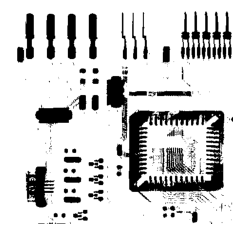

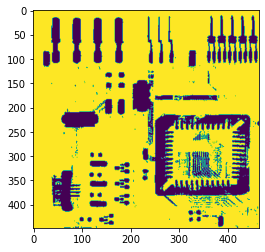

In [36]:
plt.imshow(outfinal)